In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float 


In [4]:
# Create Engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [5]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# Measurement Database Column Names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"]) 



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# View the data
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()[0]

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)

In [10]:
# Station Database Column Names
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# View the data
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

#  Exploratory Precipitation Analysis


In [12]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(last_date)


2017-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
newest_year = int(last_date[0:4])
newest_month = int(last_date[5:7])
newest_day = int(last_date[8:])
print(newest_year, newest_month, newest_day)
last_date = dt.date(newest_year, newest_month, newest_day)


2017 8 23


In [14]:
# Calculate the date one year from the last date in data set.
one_year = last_date - dt.timedelta(days=365)
print(one_year)


2016-08-23


In [15]:
# Perform a query to retrieve the date and precipitation scores
yr_prcp = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= one_year).\
        order_by(Measurement.date).all()
print(yr_prcp)

7-03-17', 0.19), ('2017-03-17', 0.06), ('2017-03-17', None), ('2017-03-17', 0.35), ('2017-03-17', 0.12), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', None), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-20', 0.0), ('2017-03-20', 0.0), ('2017-03-20', None), ('2017-03-20', 0.0), ('2017-03-20', 0.02), ('2017-03-20', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.09), ('2017-03-21', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.02), ('2017-03-23', 0.0), ('2017-03-23', 0.03), ('2017-03-24', 0.02), ('2017-03-24', 0.6), ('2017-03-24', 0.15), ('2017-03-24', 0.07), ('2017-03-24', 0.12), ('2017-03-24', 0.17), ('2017-03-25', 0.0), ('

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yr_prcp_df = pd.DataFrame(data=yr_prcp)
yr_prcp_df.set_index('date')
print(yr_prcp_df.head(15))

          date  prcp
0   2016-08-23  0.00
1   2016-08-23  0.15
2   2016-08-23  0.05
3   2016-08-23   NaN
4   2016-08-23  0.02
5   2016-08-23  1.79
6   2016-08-23  0.70
7   2016-08-24  0.08
8   2016-08-24  2.15
9   2016-08-24  2.28
10  2016-08-24   NaN
11  2016-08-24  1.22
12  2016-08-24  2.15
13  2016-08-24  1.45
14  2016-08-25  0.08


In [17]:
# Sort the dataframe by date
year_date = yr_prcp_df.sort_index()
print(year_date)

            date  prcp
0     2016-08-23  0.00
1     2016-08-23  0.15
2     2016-08-23  0.05
3     2016-08-23   NaN
4     2016-08-23  0.02
...          ...   ...
2225  2017-08-22  0.50
2226  2017-08-23  0.00
2227  2017-08-23  0.00
2228  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]


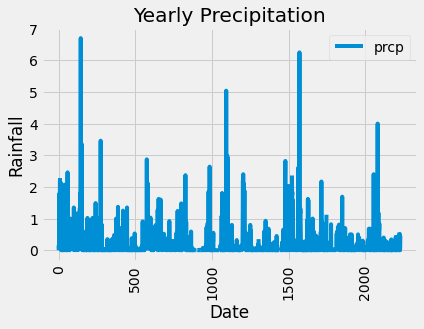

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

year_date.plot(kind="line")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Rainfall")
plt.title("Yearly Precipitation")
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = year_date.groupby('date')['prcp'].mean()
median = year_date.groupby('date')['prcp'].median()
variance = year_date.groupby('date')['prcp'].var()
stdev = year_date.groupby('date')['prcp'].std()
sem = year_date.groupby('date')['prcp'].sem()

sum_stat = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": stdev,
    "SEM": sem
    }
    )
sum_stat


,Mean,Median,Variance,Standard Deviation,SEM
date,,,,,
2016-08-23,0.451667,0.100,0.499097,0.706468,0.288414
2016-08-24,1.555000,1.800,0.706510,0.840541,0.343150
2016-08-25,0.077143,0.080,0.005157,0.071813,0.027143
2016-08-26,0.016667,0.015,0.000267,0.016330,0.006667
2016-08-27,0.064000,0.020,0.006680,0.081731,0.036551
...,...,...,...,...,...
2017-08-19,0.030000,0.000,0.002700,0.051962,0.030000
2017-08-20,0.005000,0.005,0.000050,0.007071,0.005000
2017-08-21,0.193333,0.020,0.100933,0.317700,0.183424


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_date.agg({'prcp':['mean', 'median', 'var', 'std', 'sem']})

,prcp
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
local_nums = session.query(Station).count()
local_nums

9

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stats = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

active_stats

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

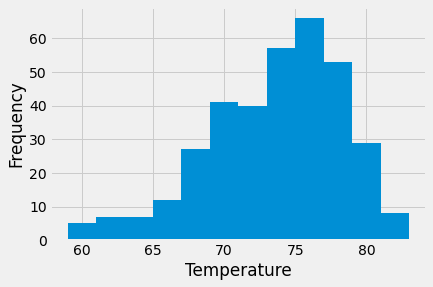

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_year = session.query(Measurement.tobs).\
        filter(Measurement.date >= one_year).\
        filter(Measurement.station =='USC00519281').\
        order_by(Measurement.date).all()

# Save the results as a DataFrame
tobs_year_df = pd.DataFrame(data=tobs_year)

x = tobs_year_df

plt.hist(x, 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

# Close session

In [25]:
# Close Session
session.close()